# 의사결정나무 알고리즘

## (1) 분류 예측 실습

### 유방암 데이터 분류 실습

사이킷런에서 제공하는 유방암 데이터를 활용하여 결정트리 분류 실습을 해보겠습니다. 전반적인 방식은 지금까지 했던 다른 머신러닝 모델과 유사합니다. Classifier를 만들고, fitting한 뒤, Test해보는 식입니다. Classifier만 DecisionTreeClassfier를 사용한다는 것을 제외하고는 다른게 거의 없습니다.

* 변수 지정 및 전처리

In [2]:
#1. 모듈 및 함수 불러오기
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

#2. 데이터 불러오기
cancer = load_breast_cancer()

#3. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

stratify값을 target 값으로 지정해주면 target의 class 비율을 유지 한 채로 데이터 셋을 split 하게 됩니다. 만약 이 옵션을 지정해주지 않고 classification 문제를 다룬다면, 성능의 차이가 많이 날 수 있습니다.

* 모형 학습 및 예측

In [3]:
#1. 모듈 및 함수 불러오기
from sklearn.tree import DecisionTreeClassifier

#2. 모형 생성
tree = DecisionTreeClassifier(random_state=0)

#3. 모형 학습 및 예측
tree.fit(X_train, y_train)

#4. 모형 평가
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


결정 트리의 default는 max_depth, min_sample_split 제한이 없으므로 한 범주에 한 종류의 데이터가 남을 때까지 가지를 칩니다. 따라서 훈련 세트의 정확도는 100%인데 테스트 세트의 정확도는 93.7%입니다

In [4]:
# 오버피팅 완화하기
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


반면, max_depth=4로 설정해주면 오버피팅을 막아 훈련 세트 정확도는 아까보다 떨어지지만 테스트 세트 정확도가 더 높아졌습니다.

* 모형 평가

In [5]:
#1. 모듈 및 함수 불러오기
from sklearn.metrics import classification_report

#2. 정밀도, 재현율, F1 스코어 출력
Y_pred=tree.predict(X_test)
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        53
           1       0.96      0.97      0.96        90

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



* 변수 중요도 출력

In [6]:
import pandas as pd
X = pd.DataFrame(X_train)
feature_name = X.columns
feature_importances = tree.feature_importances_
sorted(zip(feature_importances, feature_name), reverse=True)

[(0.7268285094603201, 20),
 (0.12211319926548449, 27),
 (0.0483982536186494, 11),
 (0.045815897088866304, 21),
 (0.0181879968644502, 26),
 (0.014157702104714051, 24),
 (0.01188547831013032, 28),
 (0.010197368202069328, 10),
 (0.002415595085315826, 14),
 (0.0, 29),
 (0.0, 25),
 (0.0, 23),
 (0.0, 22),
 (0.0, 19),
 (0.0, 18),
 (0.0, 17),
 (0.0, 16),
 (0.0, 15),
 (0.0, 13),
 (0.0, 12),
 (0.0, 9),
 (0.0, 8),
 (0.0, 7),
 (0.0, 6),
 (0.0, 5),
 (0.0, 4),
 (0.0, 3),
 (0.0, 2),
 (0.0, 1),
 (0.0, 0)]

* 모형의 시각화

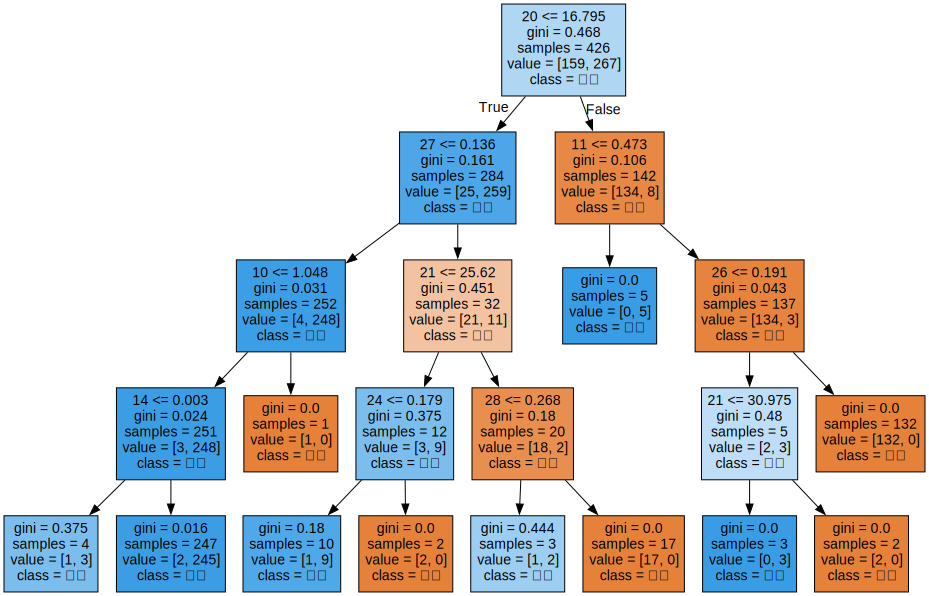

In [9]:
#1. 모듈 및 함수 불러오기
from sklearn.tree import export_graphviz
import graphviz

#2. tree.dot 파일 생성
feature_name = [str(name) for name in X.columns]
export_graphviz(tree, out_file='tree.dot', class_names= ['양성', '음성'] , \
                feature_names = feature_name, impurity=True, filled=True)
#3. tree.dot 파일 읽기
with open('tree.dot', encoding = 'utf-8') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### 고객 이탈여부 분류 예측

- 변수 지정 및 전처리

In [10]:
#1. 모듈 및 함수 불러오기
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

#2. 데이터 불러오기
df = pd.read_csv('Ashopping.csv', encoding = 'cp949')

#3. 변수 지정(독립변수/종속변수)
X=df[['총매출액', '구매금액대', '할인권 사용 횟수', '총 할인 금액', '구매유형', '구매카테고리수', '성별', '거래기간','방문빈도', '할인민감여부']]
Y=df['이탈여부']

#4. 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#5. 오버 샘플링
smote = SMOTE(random_state=0)
X_train, Y_train = smote.fit_resample(X_train, Y_train)


- 모형 학습 및 예측

In [11]:
#1. 모듈 및 함수 불러오기
from sklearn.tree import DecisionTreeClassifier

#2. 모형 생성
model = DecisionTreeClassifier(random_state=0, max_depth = 3)

#3. 모형 학습 및 예측
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print('평가용 데이터 세트에 대한 예측값\n:', Y_pred)

평가용 데이터 세트에 대한 예측값
: [0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1
 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1
 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0
 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0
 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1
 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1
 1 0 0 0]


- 모형 평가

In [12]:
print('학습용 데이터 세트 정확도: {:.3f}'.format(model.score(X_train, Y_train)))
print('평가용 데이터 세트 정확도: {:.3f}'.format(model.score(X_test, Y_test)))

학습용 데이터 세트 정확도: 0.849
평가용 데이터 세트 정확도: 0.817


In [13]:
#1. 모듈 및 함수 불러오기
from sklearn.metrics import classification_report

#2. 정밀도, 재현율, F1 스코어 출력
Y_pred=model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       219
           1       0.64      0.75      0.69        81

    accuracy                           0.82       300
   macro avg       0.77      0.80      0.78       300
weighted avg       0.83      0.82      0.82       300



- 변수 중요도 출력

In [14]:
feature_name = X.columns
feature_importances = model.feature_importances_
sorted(zip(feature_importances, feature_name), reverse=True)

[(0.9016870952751362, '거래기간'),
 (0.09813536640549, '방문빈도'),
 (0.00017753831937378827, '총 할인 금액'),
 (0.0, '할인민감여부'),
 (0.0, '할인권 사용 횟수'),
 (0.0, '총매출액'),
 (0.0, '성별'),
 (0.0, '구매카테고리수'),
 (0.0, '구매유형'),
 (0.0, '구매금액대')]

- 모형의 시각화

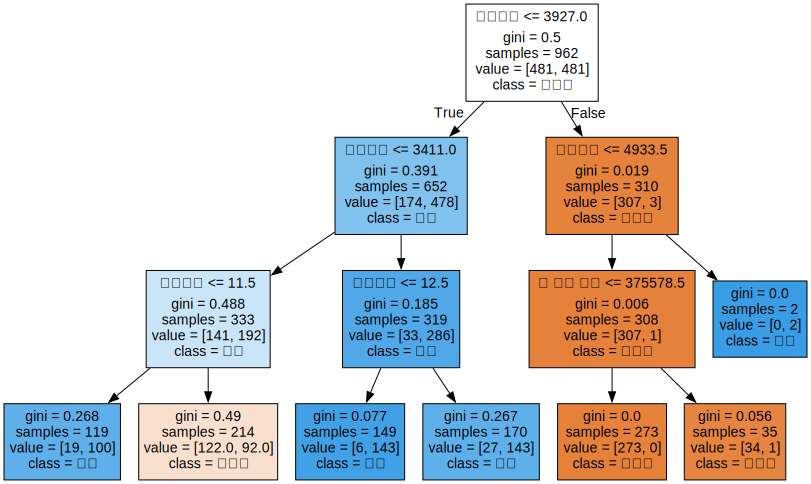

In [15]:
#1. 모듈 및 함수 불러오기
from sklearn.tree import export_graphviz
import graphviz

#2. tree.dot 파일 생성
export_graphviz(model, out_file='tree.dot', class_names= ['비이탈', '이탈'] , \
                feature_names = feature_name, impurity=True, filled=True)
#3. tree.dot 파일 읽기
with open('tree.dot', encoding = 'utf-8') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## (2) 수치 예측 실습

- 변수 지정 및 전처리

In [16]:
#1. 데이터 불러오기
df = pd.read_csv('Ashopping.csv', encoding = 'cp949')

#2. 변수 지정(독립변수/종속변수)
X = df[df.이탈여부==0][['총매출액', '구매금액대', '1회 평균매출액', '할인권 사용 횟수', '총 할인 금액', '고객등급', '구매유형', '구매카테고리수', '할인민감여부', '성별']]
Y =df[df.이탈여부==0]['평균 구매주기']

#3. 데이터 분할(학습용/평가용 데이터 세트)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

- 모형 학습 및 예측

In [17]:
#1. 모듈 및 함수 불러오기
from sklearn.tree import DecisionTreeRegressor

#2. 모형 생성
model = DecisionTreeRegressor(random_state=0, max_depth=6)

#3. 모형 학습 및 예측
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print('평가용 데이터 세트에 대한 예측값\n', Y_pred)

평가용 데이터 세트에 대한 예측값
 [455.64747475 219.52891923 188.43794852 132.12982455 121.98842338
 455.64747475  36.4605307   36.87257686 188.43794852 219.52891923
 235.97570051  52.57351837  74.96853132 219.52891923 400.49652778
 159.47256847 246.68568749 235.97570051 235.97570051 159.47256847
 298.75707848 188.43794852 182.98808089 124.78956387  69.63876479
 246.68568749 298.75707848  76.76466611  81.69969608 219.52891923
 159.47256847 423.55833333 159.47256847 297.         188.43794852
 188.43794852 219.52891923 182.98808089 188.43794852 625.06696428
 186.37920882 124.78956387 135.65359753 124.78956387 101.95083623
 455.64747475  69.63876479 188.43794852 246.68568749 352.19658123
 188.43794852 441.30536165 132.51288327 135.65359753 246.68568749
 219.52891923 352.19658123 296.30798939 186.37920882 101.95083623
 246.68568749 189.4718831  101.95083623 235.97570051 101.95083623
 162.36665117 188.43794852 149.42775149 485.1375      49.21820922
 235.97570051 149.42775149 162.36665117 162.36665117  76

- 모형 평가

In [18]:
print('학습용 데이터 세트 결정계수: {:.3f}'.format(model.score(X_train, Y_train)))
print('평가용 데이터 세트 결정계수: {:.3f}'.format(model.score(X_test, Y_test)))

학습용 데이터 세트 결정계수: 0.933
평가용 데이터 세트 결정계수: 0.740


In [19]:
#1. 모듈 및 함수 불러오기
from sklearn.metrics import mean_squared_error
from math import sqrt

#2. RMSE 계산
rmse= sqrt(mean_squared_error(Y_test, Y_pred))
print('RMSE:{:.3f}'.format(rmse))

RMSE:99.169


- 변수 중요도 출력

In [ ]:
feature_name = X.columns
feature_importances = model.feature_importances_
sorted(zip(feature_importances, feature_name), reverse=True) 

[(0.46532298995852994, '1회 평균매출액'),
 (0.4624969172850114, '총매출액'),
 (0.0319625523156692, '총 할인 금액'),
 (0.02330782493258377, '구매카테고리수'),
 (0.00933556691023202, '할인민감여부'),
 (0.006059980868302923, '구매유형'),
 (0.0010628868632488922, '고객등급'),
 (0.00045128086642188674, '할인권 사용 횟수'),
 (0.0, '성별'),
 (0.0, '구매금액대')]

- 모형의 시각화

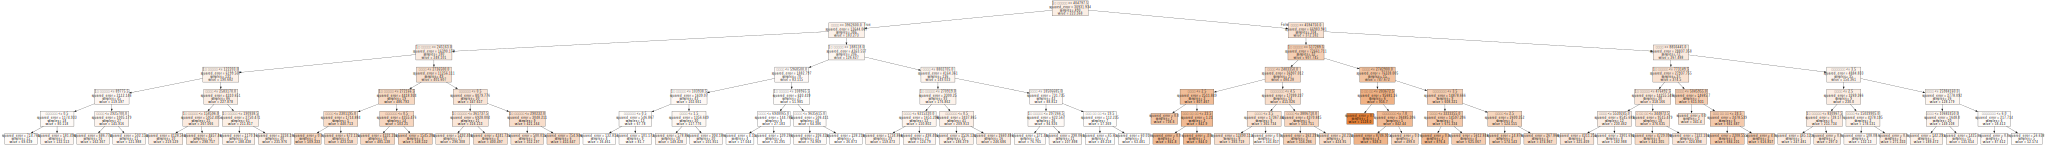

In [21]:
#1. 모듈 및 함수 불러오기
from sklearn.tree import export_graphviz
import graphviz

#2. tree.dot 파일 생성
export_graphviz(model, out_file='tree.dot',feature_names=feature_name, impurity=True, filled=True)

#3. tree.dot 파일 읽기
with open('tree.dot', encoding = 'utf-8') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## (3) 모형 성능 비교

###- 로지스틱 회귀모형 생성

In [22]:
#1. 모듈 및 함수 불러오기
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

#2. 데이터 불러오기
df = pd.read_csv('Ashopping.csv', encoding = 'cp949')

#3. 변수 지정
X1 = df[['총매출액', '거래기간', '방문빈도']]
Y1 = df['이탈여부']

#4. 데이터 분할
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.3, random_state=0)

#5. 표준화
scaler = StandardScaler()
scaler.fit(X1_train)
X1_test = scaler.transform(X1_test)
X1_train = scaler.transform(X1_train)

#6. 오버 샘플링
X1_train, Y1_train = SMOTE(random_state=0).fit_resample(X1_train, Y1_train)

#7. 모형 학습 및 예측
Logr = LogisticRegression(C = 1, random_state=0)
Logr.fit(X1_train, Y1_train)
Y1_pred = Logr.predict(X1_test)

### K-최근접 이웃 모형 생성

In [23]:
#1. 모듈 및 함수 불러오기
from sklearn.neighbors import KNeighborsClassifier


#2. 변수 지정
X2 = df[['총매출액', '방문빈도', '1회 평균매출액', '거래기간', '평균 구매주기']]
Y2 = df['이탈여부']

#3. 데이터 분할
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.3, random_state=0)

#4. 오버 샘플링
X2_train, Y2_train = SMOTE(random_state=0).fit_resample(X2_train, Y2_train)


#5. 표준화
scaler = StandardScaler().fit(X2_train)
X2_test = scaler.transform(X2_test)
X2_train = scaler.transform(X2_train)


#6. 모형 학습 및 예측
kNN = KNeighborsClassifier(n_neighbors=7)
kNN.fit(X2_train, Y2_train)
Y2_pred = kNN.predict(X2_test)


### 의사결정나무 모형 생성

In [24]:
#1. 모듈 및 함수 불러오기
from sklearn.tree import DecisionTreeClassifier

#2. 변수 지정
X3=df[['총매출액', '구매금액대', '할인권 사용 횟수', '총 할인 금액',
        '구매유형', '구매카테고리수', '성별', '거래기간','방문빈도', '할인민감여부']]
Y3= df['이탈여부']

#3. 데이터 분할
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size=0.3, random_state=0)


#4. 모형 학습 및 예측
Dtree = DecisionTreeClassifier(random_state=0, max_depth = 3)
Dtree.fit(X3_train, Y3_train)
Y3_pred=Dtree.predict(X3_test)

### ROC 곡선 및 AUC 점수 출력

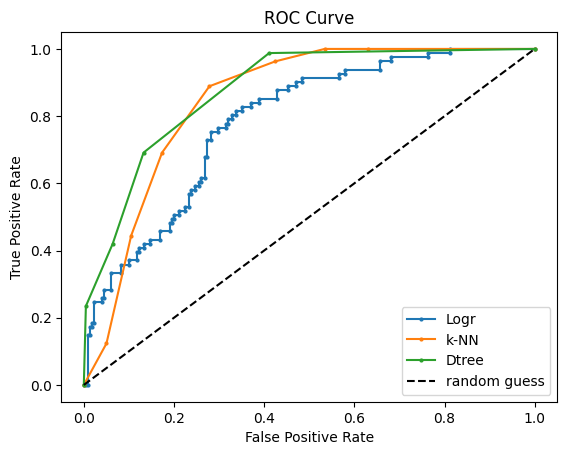

로지스틱 회귀분석 AUC 점수:0.784
k-최근접 이웃 AUC 점수::0.849
의사결정나무 AUC 점수:0.877


In [25]:
#1. 모듈 및 함수 불러오기
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

#2. ROC 곡선 객체 생성
fpr1, tpr1, thresholds = roc_curve(Y1_test,  Logr.decision_function(X1_test))
fpr2, tpr2, thresholds  = roc_curve(Y2_test, kNN.predict_proba(X2_test)[:, 1])
fpr3, tpr3, thresholds = roc_curve(Y3_test, Dtree.predict_proba(X3_test)[:, 1])

#3. ROC 곡선 시각화
plt.plot(fpr1, tpr1, 'o-', ms=2, label='Logr')
plt.plot(fpr2, tpr2, 'o-', ms=2, label='k-NN')
plt.plot(fpr3, tpr3, 'o-', ms=2, label='Dtree')
plt.plot([0, 1], [0, 1], 'k--', label='random guess')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#4. AUC 점수 계산
Logr_auc=roc_auc_score(Y1_test, Logr.decision_function(X1_test))
kNN_auc=roc_auc_score(Y2_test, kNN.predict_proba(X2_test)[:, 1])
Dtree_auc=roc_auc_score(Y3_test, Dtree.predict_proba(X3_test)[:, 1])

#5. AUC 점수 출력
print('로지스틱 회귀분석 AUC 점수:{:.3f}'.format(Logr_auc))
print('k-최근접 이웃 AUC 점수::{:.3f}'.format(kNN_auc))
print('의사결정나무 AUC 점수:{:.3f}'.format(Dtree_auc))

# 앙상블

## 투표 분류기

###투표 분류기의 클래스

사이킷런에서 제공하는 VotingClassifier 클래스 사용

In [43]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

전처리되어 .npy 파일 형태인 데이터를 호출

In [44]:
X = np.load("titanic_X_train.npy")
y = np.load("titanic_y_train.npy")

In [45]:
X[0]

array([0.27345609, 0.01415106, 0.        , 1.        , 0.        ,
       0.125     , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [46]:
y[:10]

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1.])

### 기초 모델 생성

In [47]:
clf1 = LogisticRegression(random_state=1)
clf2 = DecisionTreeClassifier(random_state=1, max_depth=4)
clf3 = GaussianNB()

eclf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('gnb',clf3)], voting='hard')

voting 관련 참고 URL: https://devkor.tistory.com/entry/Soft-Voting-%EA%B3%BC-Hard-Voting

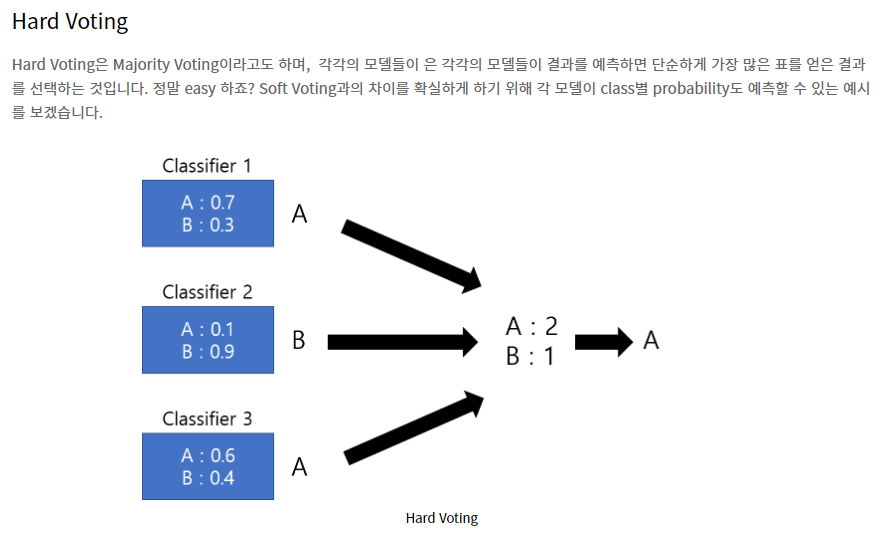

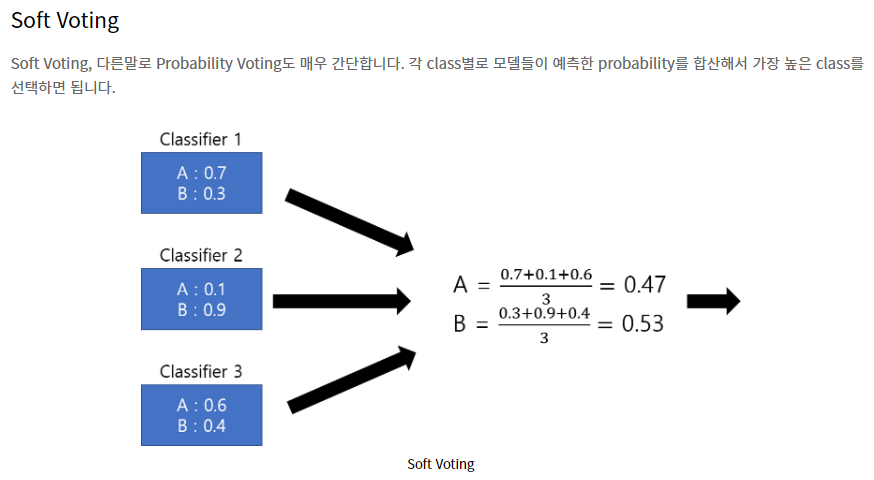

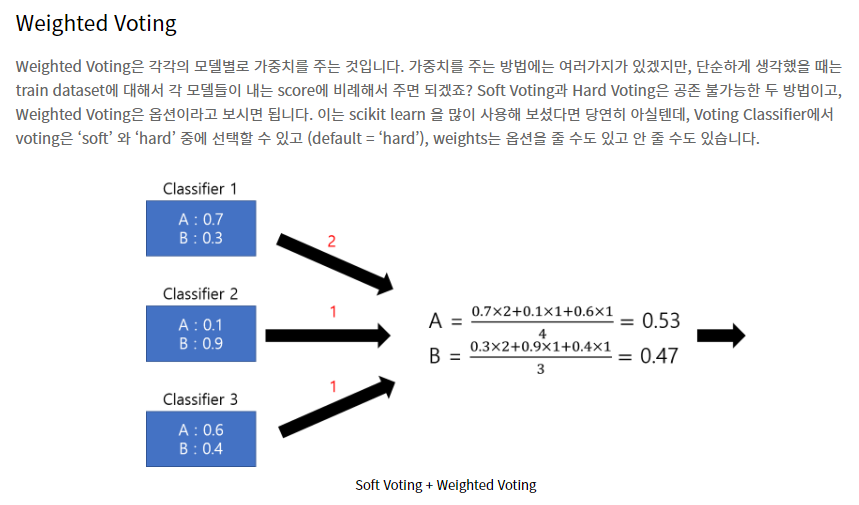

투표 분류기의 성능과 모델별 성능을 측정

In [48]:
from sklearn.model_selection import cross_val_score
cross_val_score(eclf, X, y, cv=5).mean()

0.8222941661905668

In [49]:
cross_val_score(clf1, X, y, cv=5).mean()

0.8290420872214816

In [50]:
cross_val_score(clf2, X, y, cv=5).mean()

0.8223068621849807

In [51]:
cross_val_score(clf3, X, y, cv=5).mean()

0.4600139655938551

clf3 제외하면 전체 모델 성능보다 개별 모델 성능이 높다

GaussianNB은 연속적인 데이터를 다루기 위한 모델로 데이터셋과 맞지 않아 해당 모델을 빼고 성능을 측정

In [52]:
eclf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2)], voting='hard')
cross_val_score(eclf, X, y, cv=5).mean()

0.8301783787215135

앙상블 모델에서는 반드시 많은 수의 모델 조합이 가장 최선의 결과를 내는 것이 아니다

### 하이퍼 파라미터를 튜닝한 투표 분류기

성능이 좋았던 모델 두 개를 각각 VotingClassifer에 할당

In [53]:
clf1 = LogisticRegression(random_state=1)
clf2 = DecisionTreeClassifier(random_state=1)
eclf = VotingClassifier(estimators=[('lr', clf1), ('dt', clf2)], voting='hard')

In [54]:
c_params = [0.1, 5.0, 7.0, 10.0, 15.0, 20.0, 100.0]

params ={
    "lr__solver" :
        ['liblinear'], "lr__penalty" : ["l2"], "lr__C" : c_params,
    "dt__criterion" : ["gini", "entropy"],
    "dt__max_depth" : [10,8,7,6,5,4,3,2],
    "dt__min_samples_leaf": [1,2,3,4,5,6,7,8,9]
}

가장 좋은 모델의 성능을 확인

In [55]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
grid = grid.fit(X, y)
grid.best_score_

0.8425569732749316

가장 좋은 성능을 내는 매개변수 확인

In [56]:
grid.best_params_

{'dt__criterion': 'gini',
 'dt__max_depth': 10,
 'dt__min_samples_leaf': 5,
 'lr__C': 5.0,
 'lr__penalty': 'l2',
 'lr__solver': 'liblinear'}

## 배깅과 랜덤 포레스트

* base_estimator : 사용될 수 있는 모델(default=None)

* n_estimators : int, optional(default=10), subset으로 생성되는 모델의 개수
* max_samples : int or float, optional(default=1.0), 최대 데이터 개수 또는 비율
* max_features : int or float, optional(default=1.0), 최대 사용 피쳐 또는 비율
* bootstrap : boolean, optional(default=True),  bootstrap 사용 여부
* oob_score : boolean, oob score 산출 여부
* warm_start : booeanl, optional(default=False), 이전에 학습된 모델을 사용할 것인가에 대한 정보

In [57]:
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

X = np.load("titanic_X_train.npy")
y = np.load("titanic_y_train.npy")
clf1 = LogisticRegression(random_state=1)
eclf = BaggingClassifier(clf1, oob_score=True)

from sklearn.model_selection import cross_val_score
cross_val_score(eclf, X, y, cv=5).mean()

/home/clip968/miniforge3/envs/pytorch/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:865: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/clip968/miniforge3/envs/pytorch/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:871: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
/home/clip968/miniforge3/envs/pytorch/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:865: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/clip968/miniforge3/envs/pytorch/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:871: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
/home/clip968/miniforge3/envs/pytorch/lib/py

0.8256522567130069

In [58]:
params ={
    "n_estimators" : [10,20,30,40,50,55],
    "max_samples" : [0.5,0.6,0.7,0.8,0.9,1]
}

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
grid = grid.fit(X, y)

grid.best_score_

/home/clip968/miniforge3/envs/pytorch/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:865: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/clip968/miniforge3/envs/pytorch/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:871: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
/home/clip968/miniforge3/envs/pytorch/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:865: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/home/clip968/miniforge3/envs/pytorch/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:871: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
/home/clip968/miniforge3/envs/pytorch/lib/py

0.8301720307243065

In [59]:
grid.best_params_

{'max_samples': 0.9, 'n_estimators': 40}

In [60]:
grid.best_estimator_.oob_score_

0.8166479190101237

In [61]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
X = np.load("titanic_X_train.npy")
y = np.load("titanic_y_train.npy")
eclf = RandomForestClassifier(n_estimators=100, max_features=2, n_jobs=7, oob_score=True)
from sklearn.model_selection import cross_val_score
cross_val_score(eclf, X, y, cv=5).mean()

0.8009521995810323

In [62]:
from sklearn.model_selection import GridSearchCV

params ={
    "n_estimators" : [10, 20, 30, 50, 100],
    "max_features" : [1,2,3,4,5,6,7, 10, 15, 20, 25, len(X[0])]
    }
grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
grid = grid.fit(X, y)

grid.best_score_

/home/clip968/miniforge3/envs/pytorch/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/clip968/miniforge3/envs/pytorch/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/clip968/miniforge3/envs/pytorch/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/clip968/miniforge3/envs/pytorch/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/clip968/miniforge3/envs/pytorch/li

0.8245604011934236

In [63]:
grid.best_params_

{'max_features': 25, 'n_estimators': 30}

In [64]:
grid.best_estimator_.oob_score_

0.8087739032620922

※ 기존 로지스틱 분류기 기반의 배깅 모델보다 훨씬 더 시간이 오래 걸린다. 성능 향상은 다른 알고리즘보다 실험에 의해 많이 좌우된다.


## 에이다부스트

사이킷런에서 제공하는 AdaBoostClassifier를 사용

In [65]:
import numpy as np
X = np.load("titanic_X_train.npy")
y = np.load("titanic_y_train.npy")

In [66]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
eclf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2), n_estimators=500)

In [67]:
from sklearn.model_selection import cross_val_score
cross_val_score(eclf, X, y, cv=5).mean()

0.8279248397130706

비교군으로 RandomForestClassifier를 생성


In [68]:
from sklearn.ensemble import RandomForestClassifier
eclf = RandomForestClassifier(n_estimators=500)
cross_val_score(eclf, X, y, cv=5).mean()

0.8054338856090902

GridSearchCV를 사용하여 가장 좋은 모델을 찾아 모델의 성능을 향상


In [69]:
eclf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2), n_estimators=500)
params = {"estimator__criterion" : ["gini", "entropy"], # Changed base_estimator__ to estimator__
          "estimator__max_features" : [7,8,],          # Changed base_estimator__ to estimator__
          "estimator__max_depth" : [1,2],             # Changed base_estimator__ to estimator__
          "n_estimators": [23,24, 25, 26, 27],
          "learning_rate": [0.4, 0.45, 0.5, 0.55, 0.6]
          }

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5, n_jobs=7)
grid = grid.fit(X, y)

grid.best_score_

0.8200533231765379

In [70]:
grid.best_params_

{'estimator__criterion': 'gini',
 'estimator__max_depth': 2,
 'estimator__max_features': 8,
 'learning_rate': 0.5,
 'n_estimators': 27}

feature_importances_로 각 피쳐(feature)들이 모델에 영향을 미치는 정도를 나타낼 수 있다


In [71]:
grid.best_estimator_.feature_importances_

array([0.09068656, 0.10170874, 0.04178637, 0.09459894, 0.22410554,
       0.1309261 , 0.07178062, 0.00660204, 0.00591842, 0.02379362,
       0.        , 0.        , 0.        , 0.06889058, 0.0142964 ,
       0.03498878, 0.05654572, 0.00572308, 0.01352898, 0.        ,
       0.        , 0.00792772, 0.        , 0.00619178, 0.        ,
       0.        , 0.        ])